# Project: Wrangling and Analyze Data

##### By Olugbenga Felix Ajiga 

# importing libraries

In [1]:
import pandas as pd 
import numpy as np
import tweepy
import requests
import os
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import json 
import PIL.Image
from io import BytesIO
from PIL import Image

In [2]:
# !pip install tweepy

# It's time to gather the data to be used for weRateDogs project

## Gathering
Collecting data from different sources like flat file containing WeRateDogs archived tweets. Also using twitter API to gather tweets from twitter real time but I got some challeges as regards this so I wont use the API.

In [3]:
# using WeRateDogs Twitter archive data (twitter-archive-enhanced.csv)
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
# displaying the five 1st row for visual sighting
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
# displaying the five last row for visual sighting
# twitter_archive_df.tail()

### dowaloading image-prediction file programmatically 


In [6]:
# image predictions URL provided by Udacity
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open(url.split('/')[-1], mode='wb') as file:
    file.write(r.content)

In [7]:
#Reading image_predictions.tsv file
prediction_df = pd.read_csv('image_predictions.tsv', sep='\t' )

In [8]:
prediction_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


###### Twitter API & JSON  was having issues using this code with TypeError: __init__() got an unexpected keyword argument 'wait_on_rate_limit_notify' I will preferred to use downloaded provided files instead because I tried severally but couldn't  fix it

In [9]:
# consumer_key = ''
# consumer_secret = ''
# access_token = ''
# access_secret = ''
# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)
# api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [10]:
tweet_in_json_df = pd.read_json('tweet_json.txt', lines = True,encoding='utf-8')

In [11]:
tweet_in_json_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


# Its time to assess the gathered data 

In [12]:
# sampling twitter_archive_df files
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [13]:
twitter_archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1188,718454725339934721,NaN,NaN,2016-04-08 15:05:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pic is old but I hadn't seen it until tod...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718454725...,13,10,None,None,None,None,None
645,793165685325201412,NaN,NaN,2016-10-31 19:00:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Benji. He's Air Bud. It's a low effort...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793165685...,12,10,Benji,None,None,None,None
1600,686007916130873345,NaN,NaN,2016-01-10 02:13:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper has a magical eye. 11/10 I can't s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686007916...,11,10,None,None,None,pupper,None
403,824297048279236611,NaN,NaN,2017-01-25 16:45:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nala. She got in trouble. One h*ck of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/824297048...,11,10,Nala,None,None,None,None
2042,671538301157904385,NaN,NaN,2015-12-01 03:56:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Baxter. He's very calm. Hasn't eaten i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671538301...,8,10,Baxter,None,None,None,None


In [14]:
##checking with .info()
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

<!-- #### I feel the dog stage should be a categorical data type. -->

In [15]:
# shape of data colums and rows
twitter_archive_df.shape

(2356, 17)

In [16]:
# checking number of non-null values for each of these columns
len(twitter_archive_df[twitter_archive_df['retweeted_status_id'].notnull()
    & twitter_archive_df['retweeted_status_user_id'].notnull()
    & twitter_archive_df['retweeted_status_timestamp'].notnull()])

181

In [17]:
#check tweet_id for duplicate
sum(twitter_archive_df.duplicated('tweet_id'))

0

In [18]:
# check retweet counts
twitter_archive_df.retweeted_status_user_id.count()

181

In [19]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
# use regex to extract integers before and after '/'
twitter_archive_df['text'].str.extract('(\d+)/(\d+)').astype(int).describe()

,0,1
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [21]:
##count of 'name'  have letter not name
twitter_archive_df['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

#### Observations after sampling and assessing the twitter_archive_df.
twitter_archive_df: This is untidy, a separate column for each stages will be needed.
 a closer look at some names seem out of place for instance a dog name 'a' sound wield.
 Dogs with 'None' name is quiet high (745)

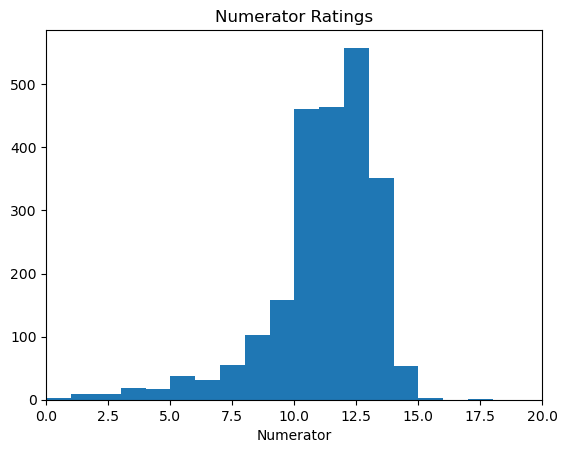

In [22]:
bins = np.arange(0, twitter_archive_df['rating_numerator'].max()+1, 1)
plt.hist(data=twitter_archive_df, x='rating_numerator', bins=bins)
plt.title('Numerator Ratings')
plt.xlabel('Numerator')
plt.xlim(0, 20);

Alot of names are inbetween 5 and 15

In [23]:
# use regex to find all lowercase names
twitter_archive_df[twitter_archive_df['name'].str.contains(r'^[^A-Z].*$')]['name'].value_counts()

a               55
the              8
an               7
very             5
just             4
quite            4
one              4
getting          2
actually         2
mad              2
not              2
old              1
life             1
officially       1
light            1
by               1
infuriating      1
such             1
all              1
unacceptable     1
this             1
his              1
my               1
incredibly       1
space            1
Name: name, dtype: int64

In [24]:
##column 'name'  have letter like'a' for instance
twitter_archive_df[twitter_archive_df.name=='a'].sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2066,671147085991960577,NaN,NaN,2015-11-30 02:01:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Helvetica Listerine named Rufus. Thi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671147085...,9,10,a,None,None,None,None
2264,667538891197542400,NaN,NaN,2015-11-20 03:04:08 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a southwest Coriander named Klint. Hat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667538891...,9,10,a,None,None,None,None
2191,668955713004314625,NaN,NaN,2015-11-24 00:54:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Slovakian Helter Skelter Feta named ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668955713...,10,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
2218,668507509523615744,NaN,NaN,2015-11-22 19:13:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Birmingham Quagmire named Chuk. Love...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668507509...,10,10,a,None,None,None,None


In [25]:
# sampling tweet_in_json_df files
tweet_in_json_df = pd.read_json('tweet_json.txt', lines = True,encoding='utf-8')

In [26]:
tweet_in_json_df.sample(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
1506,2016-01-25 04:49:38+00:00,691483041324204033,691483041324204032,When bae says they can't go out but you see th...,False,"[0, 144]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 691483034810474496, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2608,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1741,2015-12-22 20:59:10+00:00,679405845277462528,679405845277462528,Crazy unseen footage from Jurassic Park. 10/10...,False,"[0, 96]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",NaN,...,2594,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1478,2016-01-30 17:31:20+00:00,693486665285931008,693486665285931008,This is Lincoln. He doesn't understand his new...,False,"[0, 123]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 693486485266247680, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1941,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
847,2016-08-17 20:27:34+00:00,766008592277377025,766008592277377024,This is Angel. She stole the @ShopWeRateDogs s...,False,"[0, 113]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 766008557347233792, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,4149,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1885,2015-12-10 03:11:43+00:00,674788554665512960,674788554665512960,Say hello to Maggie. She's a Western Septic Do...,False,"[0, 128]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 674788547291914240, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,871,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [27]:
##checking with .info()
tweet_in_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

#### Observations after sampling and assessing the tweet_in_json_df 
tweet_in_json_df: Its 100% possible some tweets must have been deleted considering the time inerval, this will affect retweet or favorite counts. 

In [28]:
# sampling predictions_df files
predictions_df = pd.read_csv('image_predictions.tsv', sep='\t')

In [29]:
predictions_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1731,821107785811234820,https://pbs.twimg.com/media/C2UpLA-UcAEK_Fz.jpg,1,Pomeranian,0.856590,True,papillon,0.038537,True,Yorkshire_terrier,0.033146,True
1454,777189768882946048,https://pbs.twimg.com/media/Cskh9nRWYAAUxBP.jpg,2,Chihuahua,0.988412,True,Mexican_hairless,0.004177,True,hog,0.001507,False
1578,796149749086875649,https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg,1,golden_retriever,0.600276,True,Labrador_retriever,0.140798,True,seat_belt,0.087355,False
695,684460069371654144,https://pbs.twimg.com/media/CX-wzZEUwAA4ISM.jpg,1,Labrador_retriever,0.673691,True,Chesapeake_Bay_retriever,0.194897,True,American_Staffordshire_terrier,0.059471,True
93,667549055577362432,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,1,electric_fan,0.984377,False,spotlight,0.007737,False,lampshade,0.001901,False


In [30]:
##checking with .info()
predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Observations after sampling and assessing the predictions_df
predictions_df: This dataframe is untidy as a result of the predictions spreading across several columns. 
There should have been a column for each prediction number, why other columns for the actual prediction.

In [31]:
#checking for duplicates in predictions_df
sum(predictions_df.duplicated())

0

In [32]:
#checking for duplicates for tweet_id
sum(predictions_df.duplicated('tweet_id'))

0

In [33]:
duplicated_jpg_url = predictions_df[predictions_df.duplicated('jpg_url')]['tweet_id']

In [34]:
duplicated_jpg_url

1297    752309394570878976
1315    754874841593970688
1333    757729163776290825
1345    759159934323924993
1349    759566828574212096
               ...        
1903    851953902622658560
1944    861769973181624320
1992    873697596434513921
2041    885311592912609280
2055    888202515573088257
Name: tweet_id, Length: 66, dtype: int64

In [35]:
twitter_archive_df.query('tweet_id in @duplicated_jpg_url').sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
601,798665375516884993,NaN,NaN,2016-11-15 23:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lola. She fell asleep o...,6.718968e+17,4.196984e+09,2015-12-02 03:40:57 +0000,https://twitter.com/dog_rates/status/671896809...,10,10,Lola,None,None,None,None
741,780496263422808064,NaN,NaN,2016-09-26 19:56:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bell. She likes holding...,7.424232e+17,4.196984e+09,2016-06-13 18:27:32 +0000,https://twitter.com/dog_rates/status/742423170...,12,10,Bell,None,None,None,None
359,829878982036299777,NaN,NaN,2017-02-10 02:25:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Loki. He smiles like El...,8.269587e+17,4.196984e+09,2017-02-02 01:01:21 +0000,https://twitter.com/dog_rates/status/826958653...,12,10,Loki,doggo,None,None,None
847,766078092750233600,NaN,NaN,2016-08-18 01:03:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Colby. He's currently r...,7.258423e+17,4.196984e+09,2016-04-29 00:21:01 +0000,https://twitter.com/dog_rates/status/725842289...,12,10,Colby,None,None,None,None


In [36]:
sum(predictions_df.duplicated('jpg_url'))

66

In [37]:
predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


max value for p1_conf is 1 looks a bit strange and from info() no missing data

In [38]:
predictions_df.query('p1_conf+p2_conf+p3_conf > 1')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.0,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False


##  Assess section summary

### TIDINESS ASSESSMENT:

#### For predictions_df:  columns [ prediction 1, prediction 2, and prediction 3] are untidy
#### twitter_archive_df:  stage columns [doggo, floofer, pupper, and puppo] are untidy
### IN predictions_df table
#### jpg_url variable should be in twitter_archive_df table to satisfy tidiness definition
#### twitter_archive_df and predictions_df tables form two different obseravations units and will be kept seperately

###  IN twitter_archive_df table:
#### doggo, floofer, pupper and puppo will be merged into one column
#### tables twitter_archive_df and tweet_in_json_df will be under one observational unit
#### There should have been a dataframe for each of these observational units [tweet data, dog data, and image predictions]

### QUALITY ASSESSMENT:

#### IN predictions_df: the prediction number needs to have data type integer
#### One row has total confidence greater than 1 which is not normal
#### The values in p1, p2, and p3 should be properly named
#### Change 'None' to empty cell in doggo,floofer, pupper, puppo then delete
#### There are duplicated jpg_url

#### IN twitter_archive_df: some tweets in archive have missing data for retweet_count or favorite_count 
#### alot of 0 in the favorite_count

#### IN twitter_archive_df:  the dog_stage columns (doggo, floofer, pupper, and puppo) should have a categorical data type
#### using data type float for rating so that the column can be uniform
#### All dogs should have a name with proper letter casing 
#### dropping timestamp column not needed

## Cleaning

In [39]:
# 1st to backup the files and make a copy of each data
predictions_df_clean = predictions_df.copy()
twitter_archive_df_clean = twitter_archive_df.copy()
tweet_in_json_df_clean = tweet_in_json_df.copy()

### Define for twitter_archive_df_clean dataframe

removing retweets and duplicate values in jpg_url column and removing redundent variable id 

### Code

In [40]:
twitter_archive_df_clean = twitter_archive_df_clean[twitter_archive_df_clean['retweeted_status_id'].isnull()]

In [41]:
# dropping null columns
twitter_archive_df_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'],axis=1,inplace=True)

In [42]:
#removing 'none' from data frame and replacing it with '' string
stages = ['doggo','pupper', 'floofer', 'puppo' ]
for stage in stages:
       twitter_archive_df_clean[stage] = twitter_archive_df_clean[stage].replace('None', '')

### Test

In [43]:
twitter_archive_df_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,


In [44]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ 

### Define for predictions_df_clean

removing duplicate values in jpg_url column.

### Code

In [45]:
twitter_with_no_retweets = twitter_archive_df_clean['tweet_id']

In [46]:
predictions_df_clean = predictions_df_clean.query('tweet_id in @twitter_with_no_retweets')

### Test

In [47]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ 

In [48]:
sum(predictions_df_clean['jpg_url'].duplicated())

0

### Define

Removing pictures that are not of dogs when at least one value of p1_dog, p2_dog, and p3_dog is true with confidence greater than 1.

### Code

In [49]:
predictions_df_clean = predictions_df_clean.query('p1_dog == True | p2_dog == True | p3_dog == True')

### Test

In [50]:
predictions_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1686 non-null   int64  
 1   jpg_url   1686 non-null   object 
 2   img_num   1686 non-null   int64  
 3   p1        1686 non-null   object 
 4   p1_conf   1686 non-null   float64
 5   p1_dog    1686 non-null   bool   
 6   p2        1686 non-null   object 
 7   p2_conf   1686 non-null   float64
 8   p2_dog    1686 non-null   bool   
 9   p3        1686 non-null   object 
 10  p3_conf   1686 non-null   float64
 11  p3_dog    1686 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 136.7+ KB


### Define

Remove any invalid names and text related to lowercase names that do not have the phrase "We only rate dogs"

## Code

In [51]:
# allow for dogs with multiple names in regex
twitter_archive_df_clean['named'] = twitter_archive_df_clean['text'].str.extract('named ([A-Z][a-z]*(\s[A-Z][a-z]*)*)')[0]

In [52]:
# replace cells with names that come after 'named'
twitter_archive_df_clean.loc[twitter_archive_df_clean['named'].notnull(), 'name'] = twitter_archive_df_clean[twitter_archive_df_clean['named'].notnull()]['named']

In [53]:
twitter_archive_df_clean.drop('named', axis=1, inplace=True)

In [54]:
# twitter_archive_df_clean

In [55]:
with pd.option_context('display.max_rows', None):
    print(twitter_archive_df_clean[twitter_archive_df_clean['name'].str.contains(r'^[^A-Z].*$')
        & ~twitter_archive_df_clean['text'].str.contains(r'[Ww]e only rate dogs') ][['text']])

                                                   text
22    I've yet to rate a Venezuelan Hover Wiener. Th...
56    Here is a pupper approaching maximum borkdrive...
335   There's going to be a dog terminal at JFK Airp...
369   Occasionally, we're sent fantastic stories. Th...
649   Here is a perfect example of someone who has t...
852   This is my dog. Her name is Zoey. She knows I'...
924   This is one of the most inspirational stories ...
988   What jokester sent in a pic without a dog in i...
992   That is Quizno. This is his beach. He does not...
993   This is one of the most reckless puppers I've ...
1002  This is a mighty rare blue-tailed hammer sherk...
1004  Viewer discretion is advised. This is a terrib...
1025  This is an Iraqi Speed Kangaroo. It is not a d...
1040  This is actually a pupper and I'd pet it so we...
1049  This is a very rare Great Alaskan Bush Pupper....
1063  This is just downright precious af. 12/10 for ...
1095  Say hello to mad pupper. You know what you

In [56]:
# one-off name patterns
names = {247: 'Grace', 560: 'Zoey', 1629: 'Daryl'}

In [57]:
for i, name in names.items():
    twitter_archive_df_clean.iloc[i, 9] = name

In [58]:
# replace all 'None' names with NaN
twitter_archive_df_clean.loc[twitter_archive_df_clean['name']=='None', 'name'] = np.nan

## Test

In [59]:
twitter_archive_df_clean['name'].value_counts()

a             36
Lucy          11
Charlie       11
Oliver        10
Cooper        10
              ..
Kayla          1
Bell           1
Burt           1
Edmund         1
Christoper     1
Name: name, Length: 975, dtype: int64

### Define

timestamp column to be deleted

### Code

In [60]:
# drop timestamp column
twitter_archive_df_clean = twitter_archive_df_clean.drop('timestamp', 1)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_4900\2033287742.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  twitter_archive_df_clean = twitter_archive_df_clean.drop('timestamp', 1)


### test

In [61]:
#confirming deletion of timestamp column
list(twitter_archive_df_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [62]:
twitter_archive_df_clean =pd.read_csv('twitter_archive_df_clean.csv')

In [63]:
list(twitter_archive_df_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [64]:
# twitter_archive_df_clean.head()

In [65]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   source                 2175 non-null   object 
 4   text                   2175 non-null   object 
 5   expanded_urls          2117 non-null   object 
 6   rating_numerator       2175 non-null   float64
 7   rating_denominator     2175 non-null   float64
 8   name                   2175 non-null   object 
 9   doggo                  87 non-null     object 
 10  floofer                10 non-null     object 
 11  pupper                 234 non-null    object 
 12  puppo                  25 non-null     object 
dtypes: float64(4), int64(1), object(8)
memory usage: 221.0+ KB


### Define

Move jpg_url from predictions_df_clean to twitter_archive_df_clean and drop jpg_url

### Code

In [66]:
twitter_archive_df_clean = twitter_archive_df_clean.merge(predictions_df_clean, on='tweet_id', how="left")

In [67]:
twitter_archive_df_clean.drop(["p1", 'p1_conf','p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1, inplace = True)
predictions_df_clean.drop('jpg_url', axis = 1, inplace = True)

### Test

In [68]:
twitter_archive_df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'source',
       'text', 'expanded_urls', 'rating_numerator', 'rating_denominator',
       'name', 'doggo', 'floofer', 'pupper', 'puppo', 'jpg_url', 'img_num'],
      dtype='object')

In [69]:
predictions_df_clean.columns

Index(['tweet_id', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

### Define

Dropping expanded_urls from twitter_archive_df_clean

### Code

In [70]:
twitter_archive_df_clean.drop('expanded_urls', axis=1, inplace=True)

### Test

In [71]:
twitter_archive_df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'source',
       'text', 'rating_numerator', 'rating_denominator', 'name', 'doggo',
       'floofer', 'pupper', 'puppo', 'jpg_url', 'img_num'],
      dtype='object')

## Data visualization and analysis

In [72]:
twitter_archive_df_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,img_num
count,2.175000e+03,7.800000e+01,7.800000e+01,2175.000000,2175.0,1686.000000
mean,7.371205e+17,7.455079e+17,2.014171e+16,10.588579,10.0,1.215896
std,6.748668e+16,7.582492e+16,1.252797e+17,2.284616,0.0,0.576191
min,6.660209e+17,6.658147e+17,1.185634e+07,0.000000,10.0,1.000000
25%,6.768432e+17,6.757419e+17,3.086374e+08,10.000000,10.0,1.000000
50%,7.098528e+17,7.038708e+17,4.196984e+09,11.000000,10.0,1.000000
75%,7.894226e+17,8.257804e+17,4.196984e+09,12.000000,10.0,1.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,20.000000,10.0,4.000000


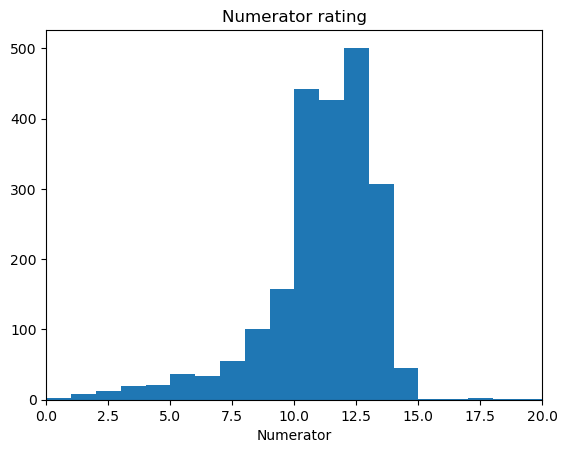

In [73]:
bins = np.arange(0, twitter_archive_df_clean['rating_numerator'].max()+1, 1)
plt.hist(data=twitter_archive_df_clean, x='rating_numerator', bins=bins)
plt.title('Numerator rating')
plt.xlabel('Numerator')
plt.xlim(0, 20);

Calculating csample_numerator_ratingonfidence interval for the mean of the rating_numerator using a bootstrapping method

In [74]:
sample_numerator_rating = twitter_archive_df_clean.rating_numerator.sample(300)

In [75]:
sample_numerator_rating_means = np.random.choice(sample_numerator_rating, size=(10000, 200)).mean(axis=1)

In [76]:
sample_numerator_rating_means

array([10.585 , 10.7525, 10.51  , ..., 10.53  , 10.695 , 10.575 ])

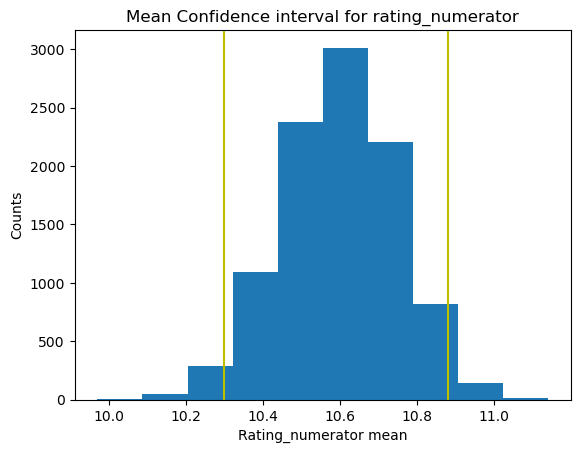

In [77]:
fig, ax = plt.subplots()
left, right = np.percentile(sample_numerator_rating_means, 2.5), np.percentile(sample_numerator_rating_means, 97.5), 
plt.hist(sample_numerator_rating_means);
plt.title('Mean Confidence interval for rating_numerator')
ax.set_xlabel('Rating_numerator mean');
ax.set_ylabel('Counts');
plt.axvline(left, color='y');
plt.axvline(right, color='y');

In [78]:
print("Mean population in between =  {}, {}".format(left, right))

Mean population in between =  10.2975, 10.88


In [83]:
twitter_archive_df_clean.to_csv('twitter_archive_clean_master.csv', index=False)

In [87]:
import re 

regex = r'''([+-]?([0-9]+[.])?[0-9]+\/[+-]?([0-9]+[.])?[0-9]+)'''

          #[+-]?([0-9]*[.])?[0-9]+\/[+-]?([0-9]*[.])?[0-9]+
def get_pattern(pat):
  try:
      return re.findall(regex, pat)[0][0]
  except Exception as e:
      return ''


twitter_archive_df_clean['pattern'] = twitter_archive_df_clean['text'].apply(get_pattern)
twitter_archive_df_clean['fraction'] = twitter_archive_df_clean['rating_numerator'].astype(str) + '/' + twitter_archive_df_clean['rating_denominator'].astype(str)
twitter_archive_df_clean[twitter_archive_df_clean['pattern'] != twitter_archive_df_clean['fraction']][['pattern', 'fraction']]

,pattern,fraction
0,13/10,13.0/10.0
1,13/10,13.0/10.0
2,12/10,12.0/10.0
3,13/10,13.0/10.0
4,12/10,12.0/10.0
...,...,...
2170,5/10,5.0/10.0
2171,6/10,6.0/10.0
2172,9/10,9.0/10.0
2173,7/10,7.0/10.0
